In [20]:
import __init__
import os
import ast  # for safely evaluating string representations of lists
from utils import comp_metrics, get_callbacks
from pathlib import Path
import tensorflow as tf
from data import load_data_with_sent
from utils import comp_metrics,describe_model_architecture
import numpy as np
import json

In [21]:
version = 'v4'
dir_path = '.'
data_path = str(Path(dir_path) /  'input/stocks_step4.csv')
output_path = str(Path(dir_path) /  f'output/{version}')
model_path = str(Path(output_path) /  'model')

In [22]:
# Daten laden
td, vd = load_data_with_sent(data_path, window_size=30)

In [23]:
# Load the saved model
loaded_model = tf.keras.models.load_model(model_path)

In [24]:
# Print layer details
print(json.dumps(describe_model_architecture(loaded_model), indent=2))

[
  {
    "name": "cnn_input",
    "type": "InputLayer"
  },
  {
    "name": "cnn_layer_1",
    "type": "Conv1D"
  },
  {
    "name": "dropout_5",
    "type": "Dropout",
    "dropout_rate": 0.1
  },
  {
    "name": "cnn_layer_2",
    "type": "Conv1D"
  },
  {
    "name": "dropout_6",
    "type": "Dropout",
    "dropout_rate": 0.1
  },
  {
    "name": "lstm_input",
    "type": "InputLayer"
  },
  {
    "name": "cnn_layer_3",
    "type": "Conv1D"
  },
  {
    "name": "lstm_1",
    "type": "LSTM",
    "units": 56
  },
  {
    "name": "dropout_7",
    "type": "Dropout",
    "dropout_rate": 0.2
  },
  {
    "name": "dropout_4",
    "type": "Dropout",
    "dropout_rate": 0.2
  },
  {
    "name": "flatten_1",
    "type": "Flatten"
  },
  {
    "name": "concatenate_1",
    "type": "Concatenate"
  },
  {
    "name": "dense_2",
    "type": "Dense",
    "units": 48
  },
  {
    "name": "dense_3",
    "type": "Dense",
    "units": 1
  }
]


Predicting AAPL...
Metrics for AAPL
Mean Absolute Error (MAE): 1.2692080736160278
Mean Squared Error (MSE): 3.203968048095703
Accuracy: 98.71%


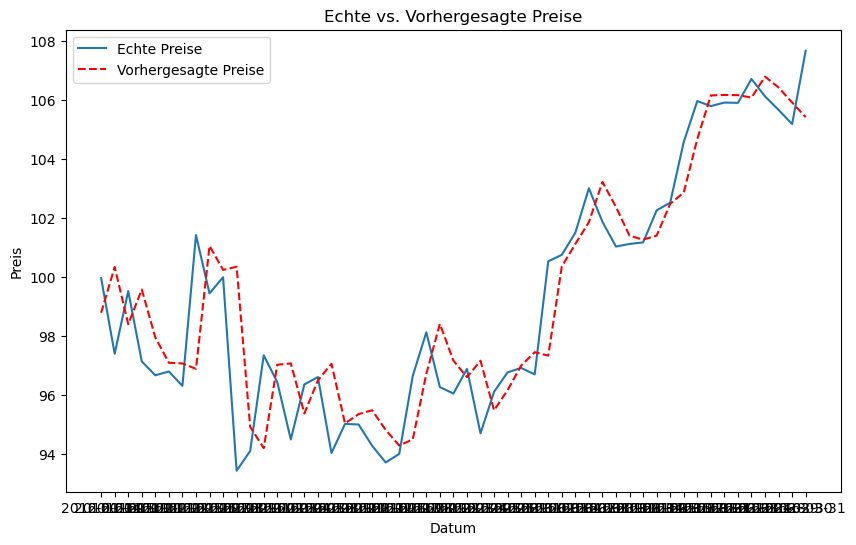

Predicting AMZN...
Metrics for AMZN
Mean Absolute Error (MAE): 10.803524017333984
Mean Squared Error (MSE): 246.7173309326172
Accuracy: 98.08%


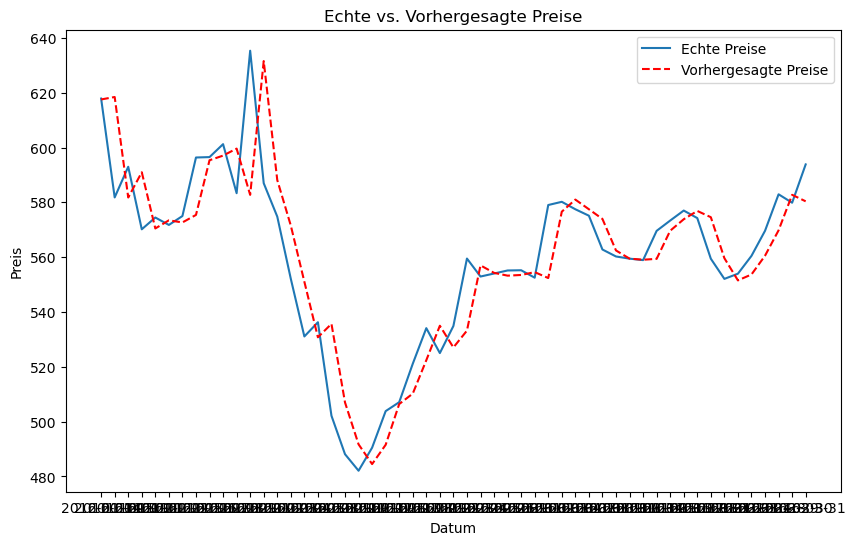

Predicting CSCO...
Metrics for CSCO
Mean Absolute Error (MAE): 0.35588449239730835
Mean Squared Error (MSE): 0.24939897656440735
Accuracy: 98.57%


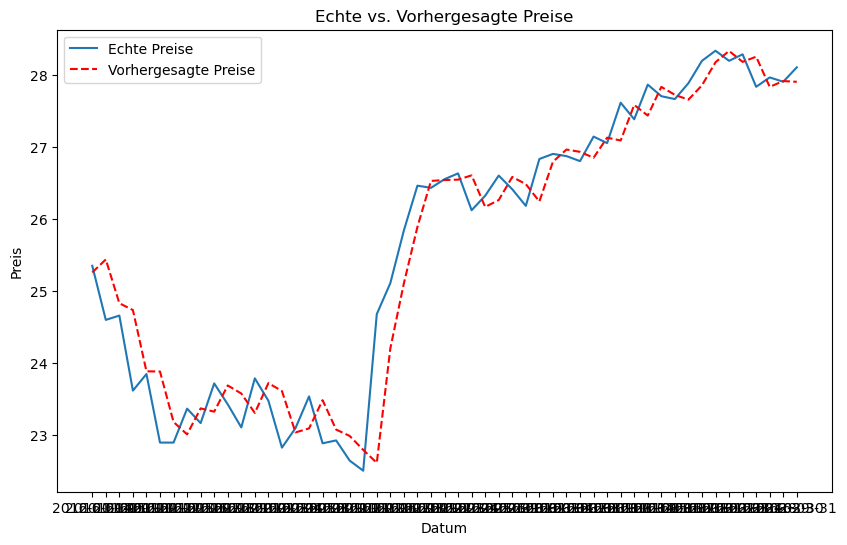

Predicting FB...
Metrics for FB
Mean Absolute Error (MAE): 1.8102948665618896
Mean Squared Error (MSE): 7.999095916748047
Accuracy: 98.28%


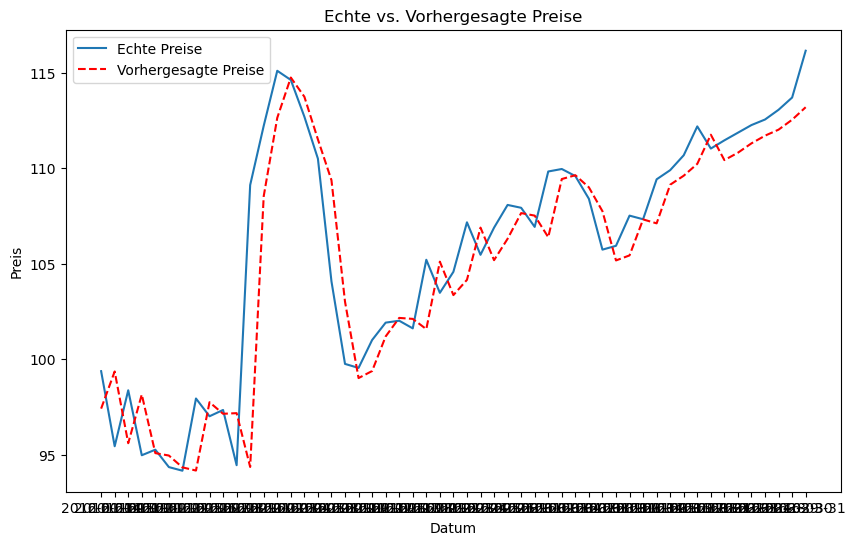

Predicting GOOG...
Metrics for GOOG
Mean Absolute Error (MAE): 9.068925857543945
Mean Squared Error (MSE): 146.60708618164062
Accuracy: 98.73%


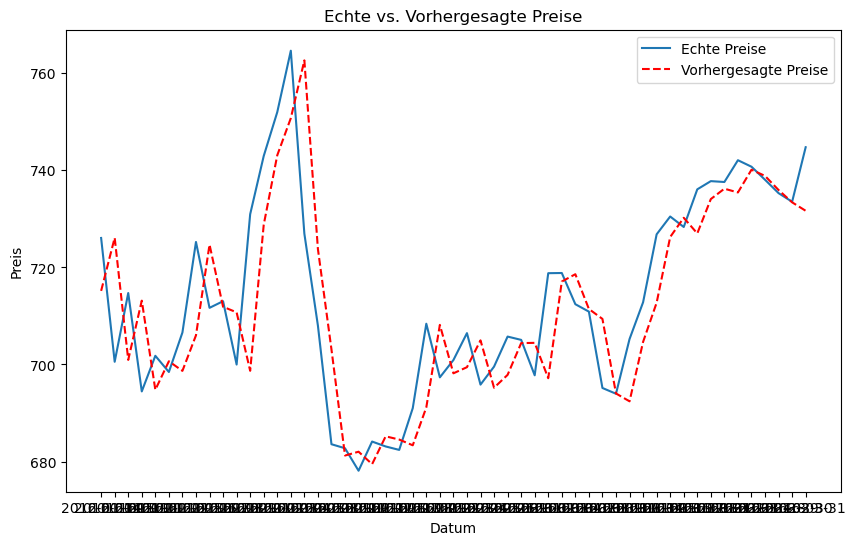

Predicting INTC...
Metrics for INTC
Mean Absolute Error (MAE): 0.4024459421634674
Mean Squared Error (MSE): 0.3541022837162018
Accuracy: 98.67%


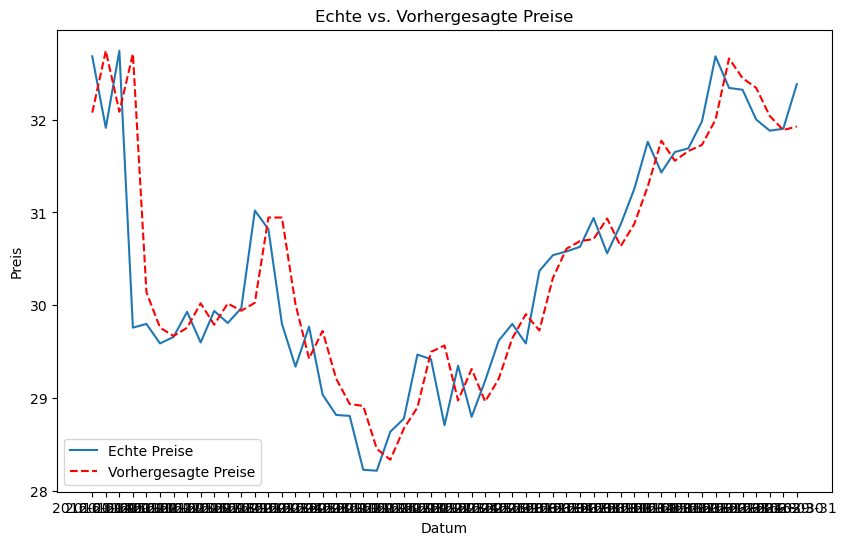

Predicting KO...
Metrics for KO
Mean Absolute Error (MAE): 0.29591843485832214
Mean Squared Error (MSE): 0.1450192928314209
Accuracy: 99.32%


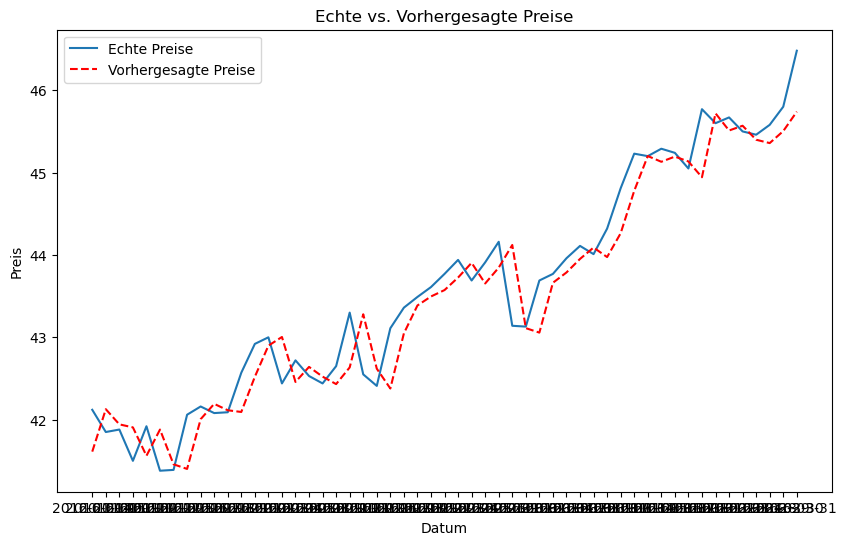

Predicting MA...
Metrics for MA
Mean Absolute Error (MAE): 1.2052196264266968
Mean Squared Error (MSE): 2.566817283630371
Accuracy: 98.61%


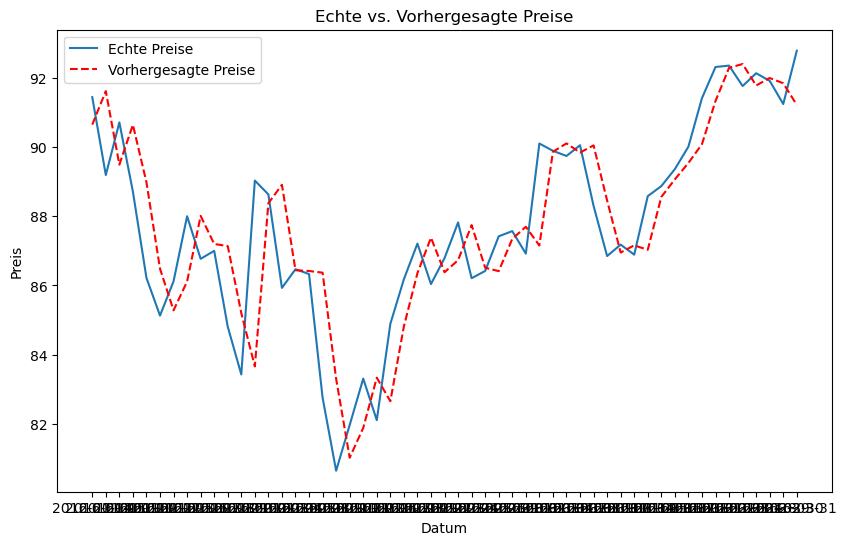

Predicting MSFT...
Metrics for MSFT
Mean Absolute Error (MAE): 0.7761160135269165
Mean Squared Error (MSE): 0.9578953385353088
Accuracy: 98.52%


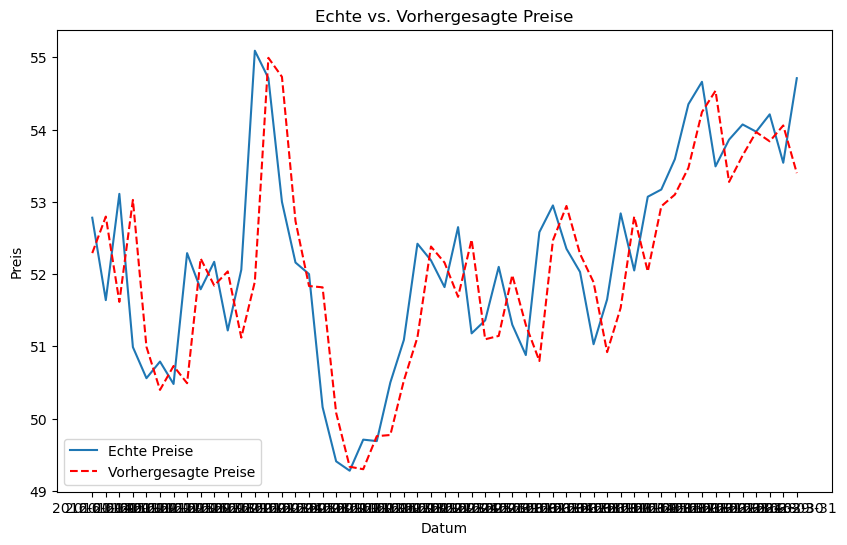

Predicting ORCL...
Metrics for ORCL
Mean Absolute Error (MAE): 0.42465901374816895
Mean Squared Error (MSE): 0.28998643159866333
Accuracy: 98.85%


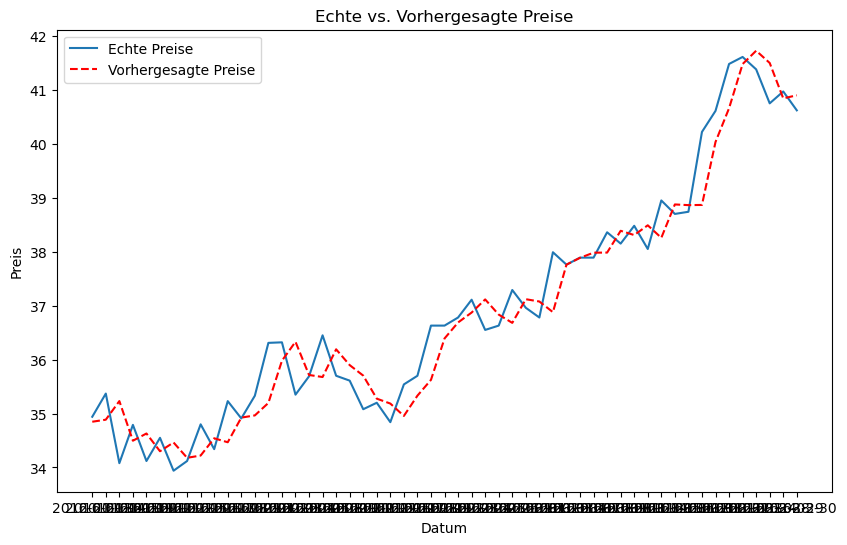

In [25]:
for i in range(len(vd)):
    stock_vd = vd[i]
    scaler = stock_vd['scaler']
    stock_name = stock_vd['stock']
    df = stock_vd['df']
    
    X = []
    y = []
    for i in range(len(stock_vd['val_data'])):
        data = stock_vd['val_data'][i]
        X.append(data[0])
        y.append(data[1])
        
    X = np.array(X)
    X_nums = X[:,:, :1]
    X_sent = X[:,:10, 1:]
    y = np.array(y)
    
    print(f'Predicting {stock_name}...')
    y_pred = loaded_model.predict([X_nums, X_sent])
    print(f'Metrics for {stock_name}')
    comp_metrics(scaler, y, y_pred, df)